In [29]:
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, classification_report

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics 

In [31]:
df = pd.read_csv(r"C:\Users\fatim\OneDrive\Desktop\IMDb Movies India.csv" , encoding = 'latin-1')
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [33]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [38]:
#Remove rows having NaN values
df1 = df.dropna(subset =['Rating','Genre','Director','Actor 1', 'Actor 2','Actor 3'] )


In [39]:
df1.isnull().sum()

Name           0
Year           0
Duration    1899
Genre          0
Rating         0
Votes          0
Director       0
Actor 1        0
Actor 2        0
Actor 3        0
dtype: int64

In [40]:
df1

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15501,Zulm Ki Hukumat,(1992),NaN,"Action, Crime, Drama",5.3,135,Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [42]:
#Check for dupliactes
duplicates = df1[df1.duplicated(subset=['Name', 'Year'], keep=False)]
duplicates

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
6062,India's Daughter,(2015),63 min,"Documentary, Biography, Crime",8.2,"1,998",Leslee Udwin,Asha Devi,Badri Singh,Satendra
6063,India's Daughter,(2015),120 min,"Action, Crime, Drama",6.9,21,Rupesh Paul,Omkar Das Manikpuri,Amann Grewal,Vishal Om Prakash
12420,Sant Dnyaneshwar,(1940),139 min,Fantasy,7.9,45,Vishnupant Govind Damle,Sheikh Fattelal,Shahu Modak,Datta Dharmadhikari
12421,Sant Dnyaneshwar,(1940),137 min,Biography,8.1,9,Vishnupant Govind Damle,Sheikh Fattelal,Shahu Modak,Datta Dharmadhikari
14880,Vikram,(1986),136 min,"Action, Adventure, Sci-Fi",7.3,504,Rajasekar,Kamal Haasan,Sathyaraj,Ambika
14881,Vikram,(1986),NaN,"Action, Drama, Romance",7.1,38,V. Madhusudan Rao,Nagarjuna Akkineni,Shobana,Annapoorna


In [43]:
#Remove any duplicated movies based on Name and Year 
df1.drop_duplicates(subset=['Name', 'Year'])

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15501,Zulm Ki Hukumat,(1992),NaN,"Action, Crime, Drama",5.3,135,Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


# Data Visualization

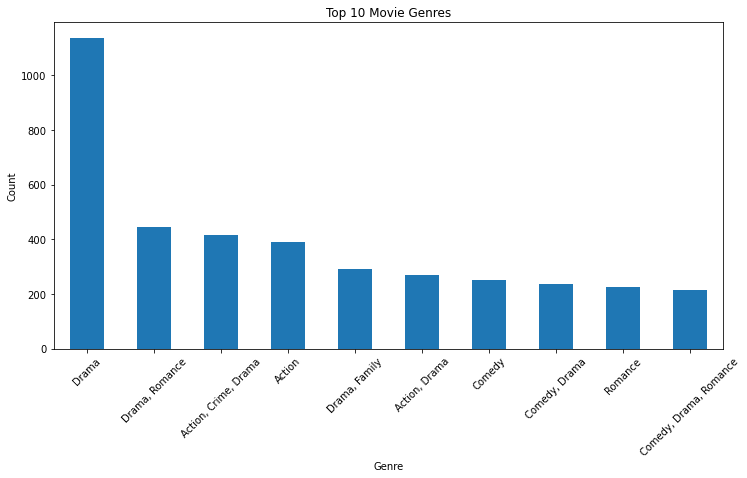

In [46]:
##Top 10 Genres 
count = df1['Genre'].value_counts().head(10)
count.plot(kind='bar', figsize=(12, 6))
plt.title('Top 10 Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


# Feature Engineering

In [49]:
df1.drop(['Name','Year','Duration','Votes'], axis=1,inplace=True)
df1.head()

C:\Users\fatim\AppData\Local\Temp\ipykernel_11884\484672411.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['Name','Year','Duration','Votes'], axis=1,inplace=True)


,Genre,Rating,Director,Actor 1,Actor 2,Actor 3
1,Drama,7.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,"Comedy, Romance",4.4,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,"Comedy, Drama, Musical",4.7,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,"Drama, Romance, War",7.4,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,"Horror, Mystery, Thriller",5.6,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [50]:
df1

,Genre,Rating,Director,Actor 1,Actor 2,Actor 3
1,Drama,7.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,"Comedy, Romance",4.4,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,"Comedy, Drama, Musical",4.7,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,"Drama, Romance, War",7.4,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,"Horror, Mystery, Thriller",5.6,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...
15501,"Action, Crime, Drama",5.3,Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda
15503,"Action, Crime, Drama",5.8,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15504,Action,4.6,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,"Action, Drama",4.5,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [60]:
X = df1[['Genre','Director','Actor 1','Actor 2', 'Actor 3']]
y = df1['Rating']
X

,Genre,Director,Actor 1,Actor 2,Actor 3
1,Drama,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,"Comedy, Romance",Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,"Comedy, Drama, Musical",Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,"Drama, Romance, War",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,"Horror, Mystery, Thriller",Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...
15501,"Action, Crime, Drama",Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda
15503,"Action, Crime, Drama",S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15504,Action,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,"Action, Drama",Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [64]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

X['Genre'] = label_encoder.fit_transform(X['Genre'])
X['Director'] = label_encoder.fit_transform(X['Director'])
X['Actor 1'] = label_encoder.fit_transform(X['Actor 1'])
X['Actor 2'] = label_encoder.fit_transform(X['Actor 2'])
X['Actor 3'] = label_encoder.fit_transform(X['Actor 3'])



C:\Users\fatim\AppData\Local\Temp\ipykernel_11884\1461052288.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Genre'] = label_encoder.fit_transform(X['Genre'])
C:\Users\fatim\AppData\Local\Temp\ipykernel_11884\1461052288.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Director'] = label_encoder.fit_transform(X['Director'])
C:\Users\fatim\AppData\Local\Temp\ipykernel_11884\1461052288.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

In [150]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50 )
print("Shape of Training dataset: ", X_train.shape)
print("Shape of Testing dataset: ", X_test.shape)

Shape of Training dataset:  (6046, 5)
Shape of Testing dataset:  (1512, 5)


In [151]:
# Scaling our dataset 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Building 

In [152]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred1 = model.predict(X_test)

In [153]:
from sklearn.metrics import mean_absolute_error, mean_squared_error as score
import numpy as np
mae = mean_absolute_error(y_test, y_pred1)
mse = mean_squared_error(y_test, y_pred1)
r2 = r2_score(y_test, y_pred1)
ape = np.abs((y_test - y_pred1) / y_test) * 100
mape = np.mean(ape)



In [154]:
print("Mean Absolute Error: ", mae)
print("Mean squared Error: ", mse)
print(r2)
print("Mean Absolute Percentage Error (MAPE): {:.2f}%".format(mape))


Mean Absolute Error:  1.087280942126527
Mean squared Error:  1.8051376380510513
0.02195804828826675
Mean Absolute Percentage Error (MAPE): 22.05%


In [155]:
from sklearn.ensemble import RandomForestRegressor
model1 = RandomForestRegressor(n_estimators=100, random_state=42)
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)

In [156]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error: ", mae)
print("Mean squared Error: ", mse)
print(r2)




Mean Absolute Error:  1.032114131393298
Mean squared Error:  1.6602162400624632
0.10047793726835752


In [157]:
import numpy as np
ape = np.abs((y_test - y_pred) / y_test) * 100
mape = np.mean(ape)


In [158]:
print("Mean Absolute Percentage Error (MAPE): {:.2f}%".format(mape))

Mean Absolute Percentage Error (MAPE): 20.68%


In [159]:
## using Random Forest
new_input = pd.DataFrame({
    'Genre': ['Drama'],  
    'Director': ['Gaurav Bakshi'],   
    'Actor 1': ['Rasika Dugal'],       
    'Actor 2': ['Vivek Ghamande'],   
    'Actor 3': ['Arvind Jangid']         
})


new_input['Genre'] = label_encoder.fit_transform(new_input['Genre'])
new_input['Director'] = label_encoder.fit_transform(new_input['Director'])
new_input['Actor 1'] = label_encoder.fit_transform(new_input['Actor 1'])
new_input['Actor 2'] = label_encoder.fit_transform(new_input['Actor 2'])
new_input['Actor 3'] = label_encoder.fit_transform(new_input['Actor 3'])

predicted_rating = model1.predict(new_input)

print("Predicted Rating:", predicted_rating)


Predicted Rating: [7.105]


In [122]:
df1

,Genre,Rating,Director,Actor 1,Actor 2,Actor 3
1,Drama,7.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,"Comedy, Romance",4.4,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,"Comedy, Drama, Musical",4.7,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,"Drama, Romance, War",7.4,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,"Horror, Mystery, Thriller",5.6,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...
15501,"Action, Crime, Drama",5.3,Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda
15503,"Action, Crime, Drama",5.8,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15504,Action,4.6,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,"Action, Drama",4.5,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [160]:
##using linear regression
new_input = pd.DataFrame({
    'Genre': ['Drama'],  
    'Director': ['Gaurav Bakshi'],   
    'Actor 1': ['Rasika Dugal'],       
    'Actor 2': ['Vivek Ghamande'],   
    'Actor 3': ['Arvind Jangid']         
})


new_input['Genre'] = label_encoder.fit_transform(new_input['Genre'])
new_input['Director'] = label_encoder.fit_transform(new_input['Director'])
new_input['Actor 1'] = label_encoder.fit_transform(new_input['Actor 1'])
new_input['Actor 2'] = label_encoder.fit_transform(new_input['Actor 2'])
new_input['Actor 3'] = label_encoder.fit_transform(new_input['Actor 3'])

predicted_rating = model.predict(new_input)

print("Predicted Rating:", predicted_rating)


Predicted Rating: [5.32071241]
